In [17]:
import glob
import os

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#open package for Particle Image Velocimetry
import openpiv.tools
import openpiv.process
import openpiv.validation
import openpiv.filters

import scipy
import scipy.sparse
import scipy.sparse.linalg

In [37]:
dirName = '555'
pattern = '555_page_*.bmp'
refFile = 'refgood.bmp'

In [38]:
#Generates a list of strings containing file paths
frames = sorted(glob.glob(os.path.join(os.path.abspath(dirName), pattern)))

In [39]:
#A gradient operator
def getGrad(length, width, spacing):
    A = scipy.sparse.diags([-0.5/spacing, 0.5/spacing], [0, 1], shape = (width - 1, width))
    B = scipy.sparse.diags([0.5/spacing, 0.5/spacing], [0, 1], shape = (width - 1, width))
    shape = np.reshape(([A]*2+[None]*(length-1))*(length-2)+[A]*2 + ([B]+[-B]+[None]*(length-1))*(length-2)+[B]+[-B], (2*length-2, length))
    return scipy.sparse.bmat(shape)

In [40]:
#Process image pairs
def process(file_a, file_b, counter):
    print('process() called')
    #useless parameters
    a = 0
    b = 10000
    c = 0
    d = 10000
    
    #Read images
    frame_a = ((openpiv.tools.imread(file_a, 1)[a:b, c:d])*256).astype('int32')
    frame_b = ((openpiv.tools.imread(file_b, 1)[a:b, c:d])).astype('int32')
    
    print('read image, processing')
    #Use openpiv to get displacement field
    u, v, sig2noise = openpiv.process.extended_search_area_piv(frame_a, frame_b, window_size=40, overlap=20, dt=1, search_area_size=120, sig2noise_method='peak2peak')
    x, y = openpiv.process.get_coordinates(image_size=frame_a.shape, window_size=40, overlap=20)
    
    print('searched')
    #Filter bad vectors
    u, v, mask = openpiv.validation.global_val(u, v, (-8, 8), (-8, 8))
    u, v, mask = openpiv.validation.global_std(u, v, std_threshold = 3)
    u, v, mask = openpiv.validation.local_median_val(u, v, u_threshold = 0.8, v_threshold = 0.8, size=1)
    u, v = openpiv.filters.replace_outliers(u, v, method='localmean', max_iter=10, kernel_size=2)
    u -= u.mean()
    v -= v.mean()
    
    #Inverse gradient reconstructs height
    A = getGrad(len(u)+1, len(u[0])+1, x[0][0]*2)
    b = np.hstack([u.flatten(), v.flatten()])
    s = np.array(np.split(scipy.sparse.linalg.lsqr(A, b)[0], len(u)+1))
    s *= (-0.0057) ##convertion factor
    
    print('processed')
    #Plot the height and save the images
    plt.matshow(s, cmap = 'coolwarm', vmin=-1.5, vmax=1.0)
    plt.colorbar()
    print('image generated')
    plt.savefig('./plot/%3d' % counter)
    print('saved ' + str(counter + 1))

process() called
read image, processing
searched
processed
image generated


c:\python3.6.5\lib\site-packages\openpiv\validation.py:113: RuntimeWarning: invalid value encountered in greater
  ind = vel_magnitude > std_threshold*np.std(vel_magnitude)
c:\python3.6.5\lib\site-packages\openpiv\validation.py:213: RuntimeWarning: invalid value encountered in greater
  ind = (np.abs( (u-um) ) > u_threshold) | (np.abs( (v-vm) ) > v_threshold)


saved 1
process() called
read image, processing
searched
processed
image generated
saved 2
process() called
read image, processing
searched
processed
image generated
saved 3
process() called
read image, processing
searched
processed
image generated
saved 4
process() called
read image, processing
searched
processed
image generated
saved 5
process() called
read image, processing
searched
processed
image generated
saved 6
process() called
read image, processing
searched
processed
image generated
saved 7
process() called
read image, processing
searched
processed
image generated
saved 8
process() called
read image, processing
searched
processed
image generated
saved 9
process() called
read image, processing
searched
processed
image generated
saved 10
process() called
read image, processing
searched
processed
image generated
saved 11
process() called
read image, processing
searched
processed
image generated
saved 12
process() called
read image, processing
searched
processed
image generated
s

c:\python3.6.5\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


saved 21
process() called
read image, processing
searched
processed
image generated
saved 22
process() called
read image, processing
searched
processed
image generated
saved 23
process() called
read image, processing
searched
processed
image generated
saved 24
process() called
read image, processing
searched
processed
image generated
saved 25
process() called
read image, processing
searched
processed
image generated
saved 26
process() called
read image, processing
searched
processed
image generated
saved 27
process() called
read image, processing
searched
processed
image generated
saved 28
process() called
read image, processing
searched
processed
image generated
saved 29
process() called
read image, processing
searched
processed
image generated
saved 30
process() called
read image, processing
searched
processed
image generated
saved 31
process() called
read image, processing
searched
processed
image generated
saved 32
process() called
read image, processing
searched
processed
image ge

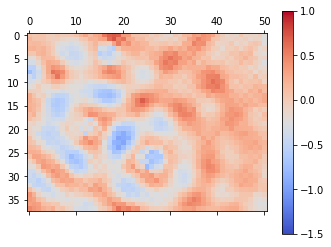

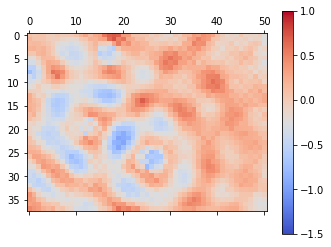

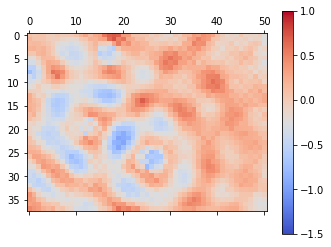

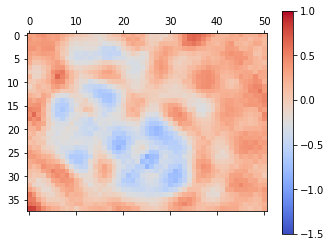

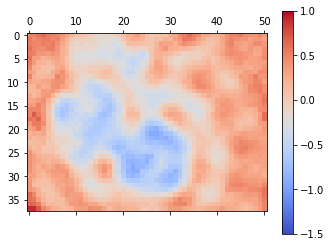

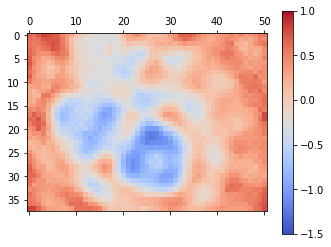

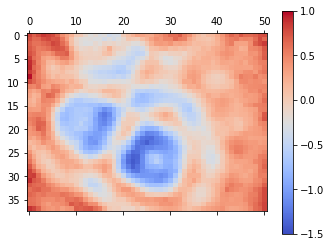

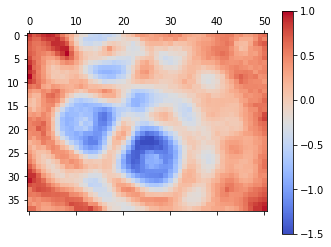

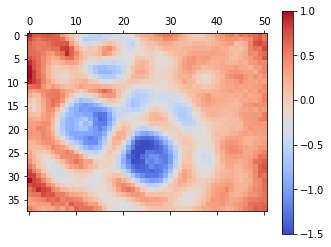

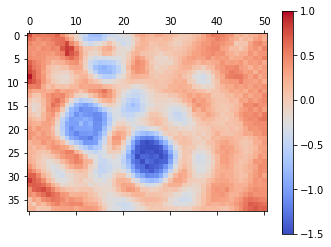

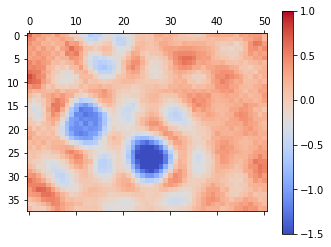

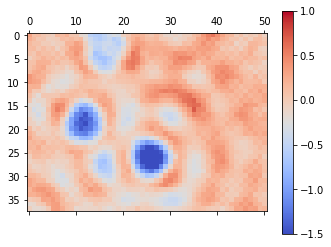

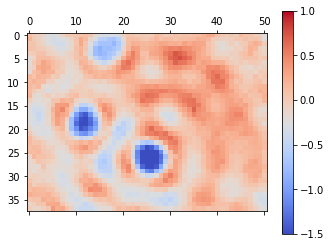

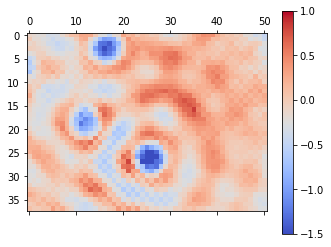

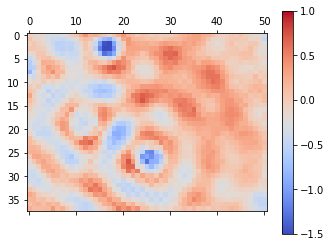

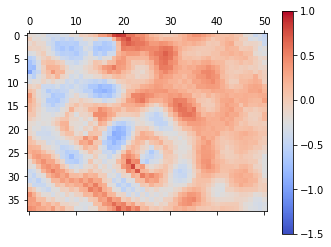

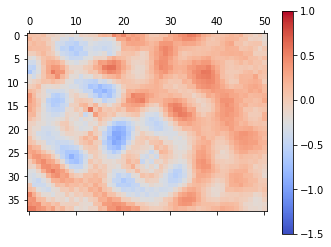

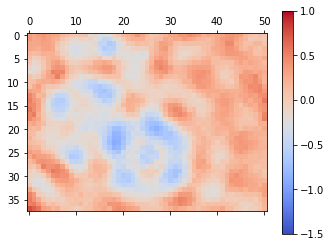

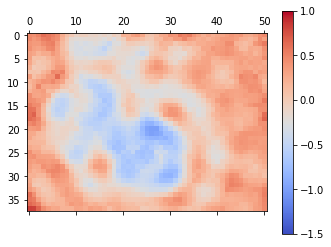

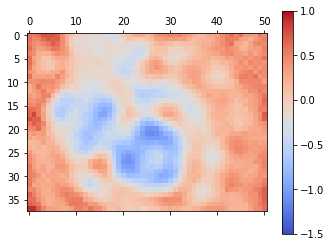

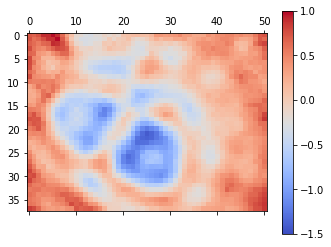

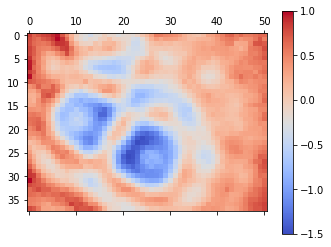

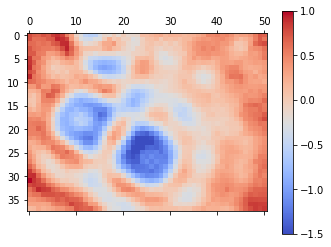

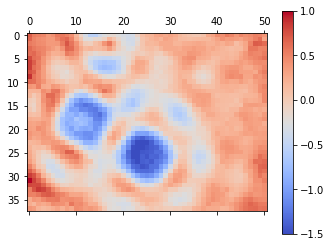

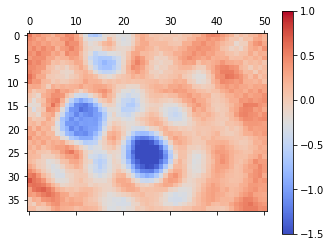

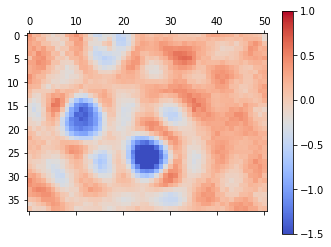

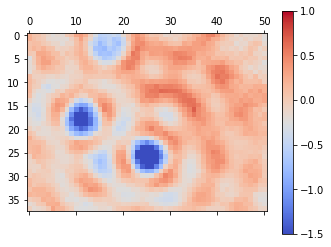

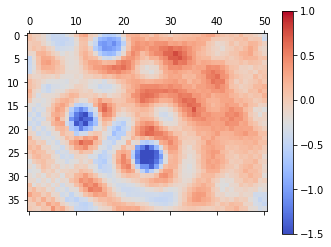

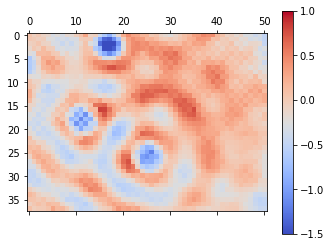

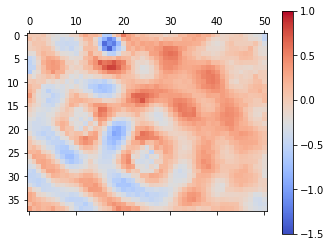

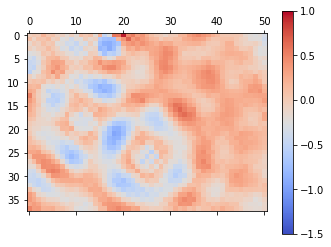

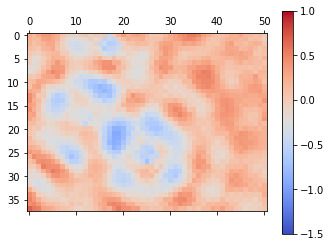

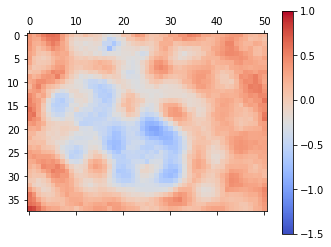

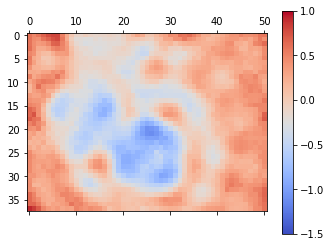

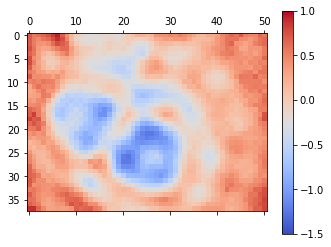

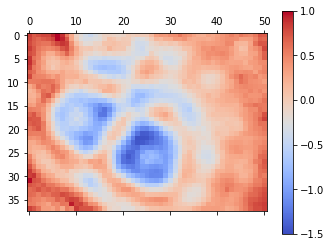

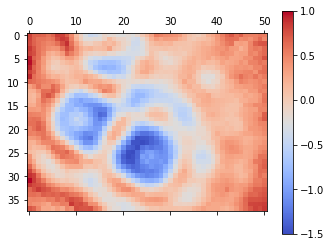

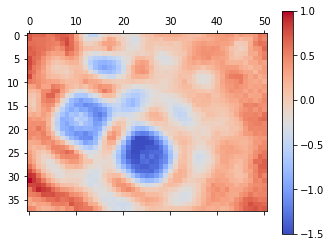

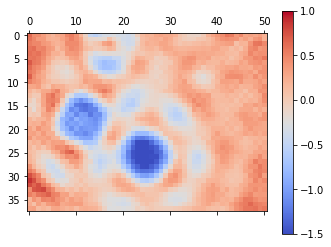

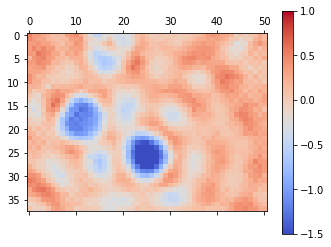

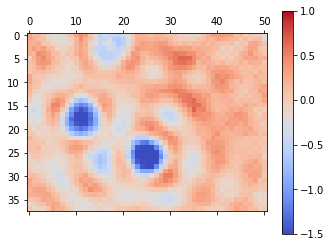

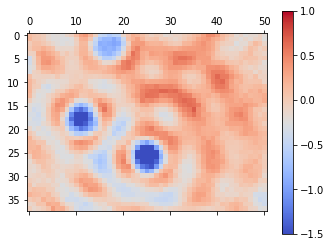

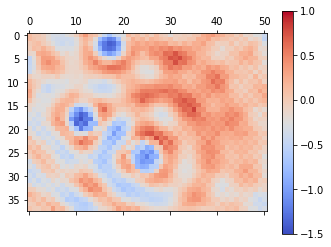

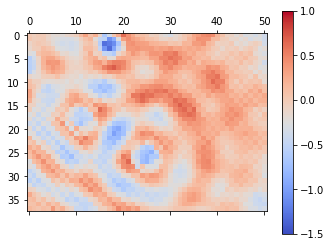

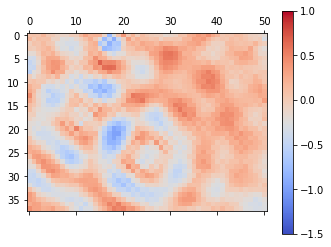

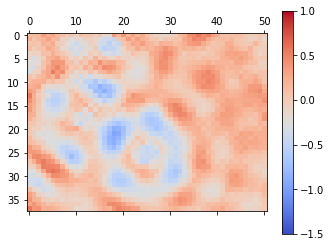

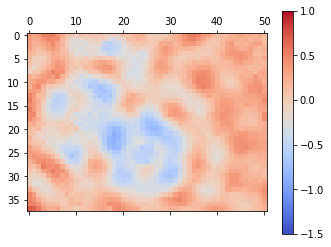

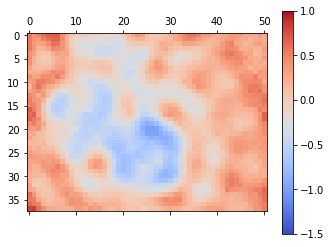

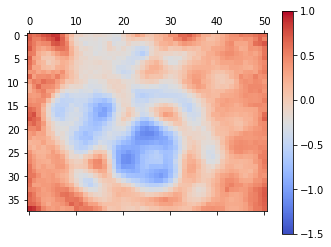

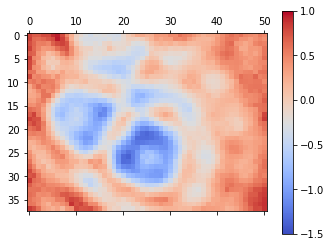

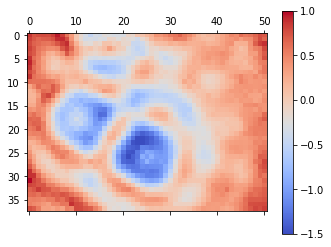

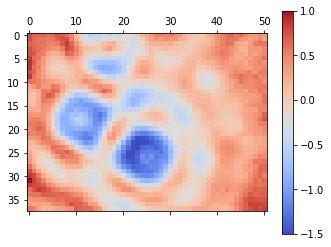

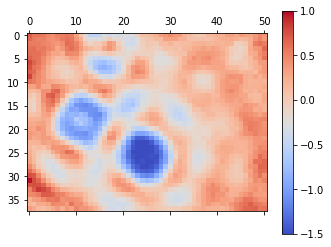

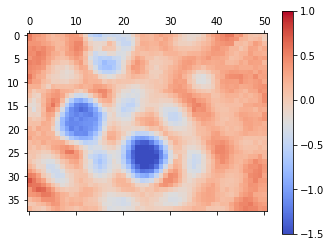

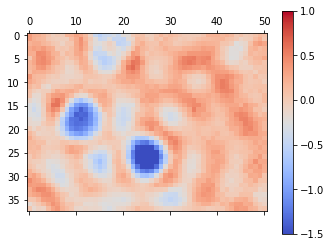

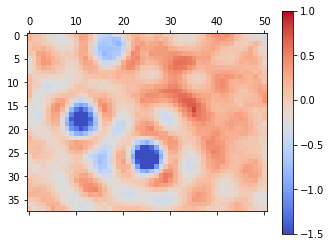

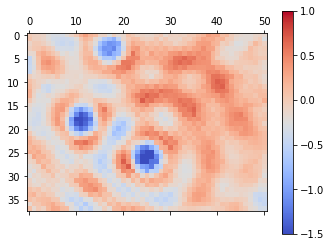

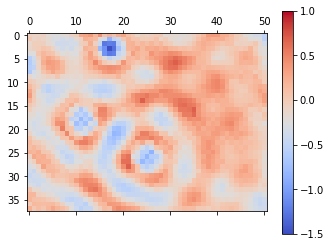

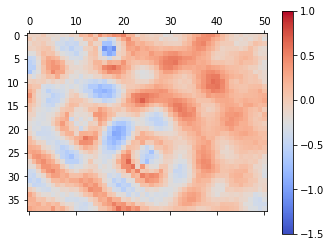

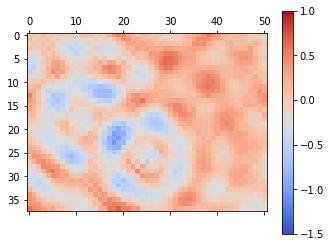

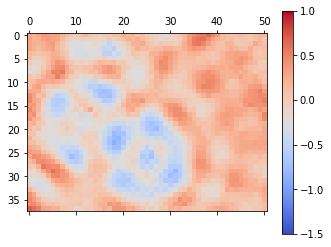

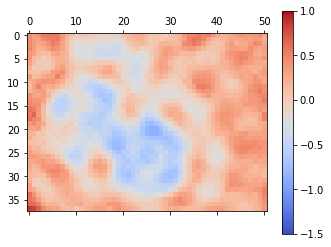

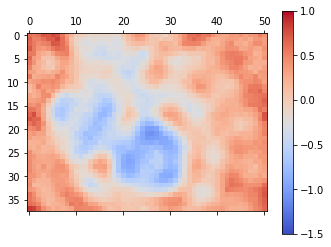

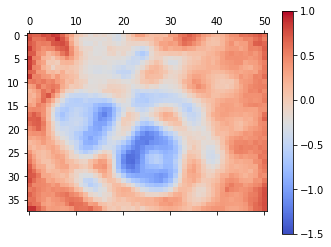

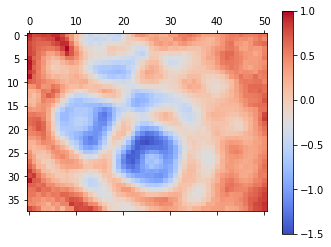

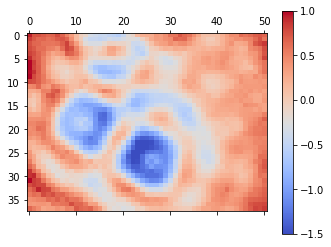

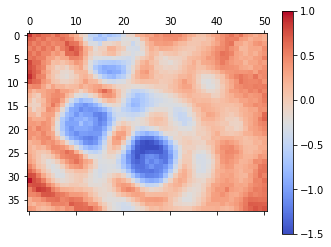

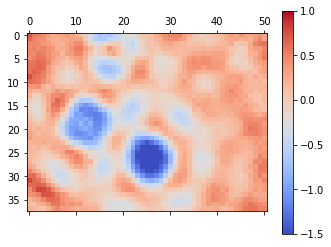

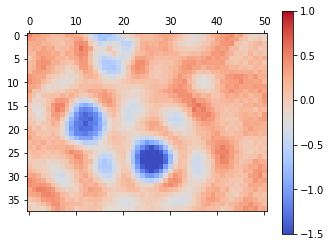

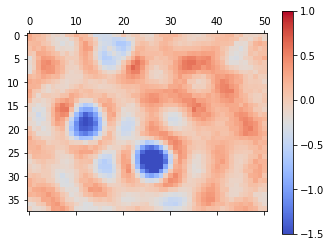

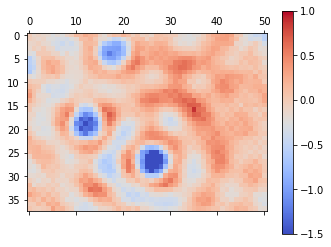

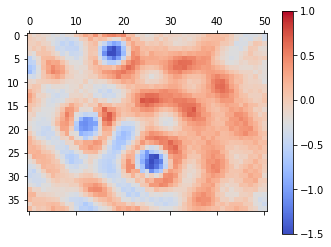

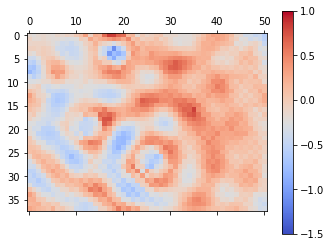

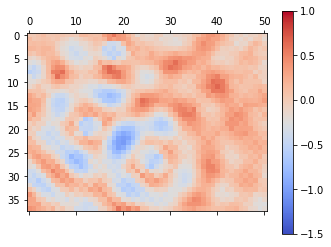

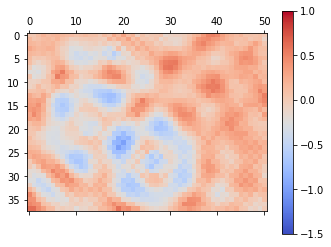

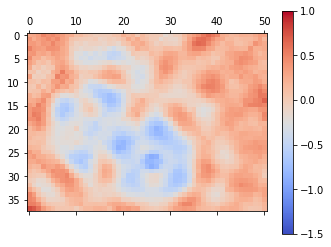

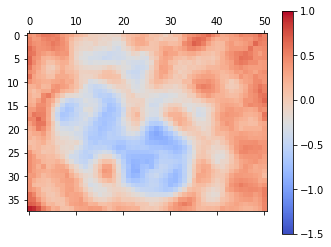

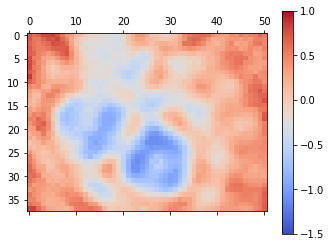

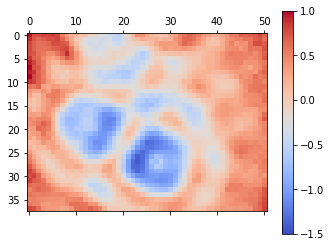

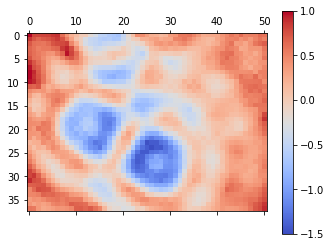

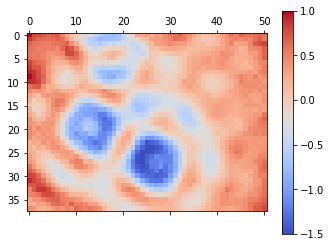

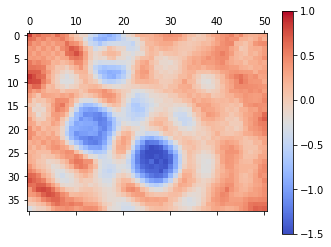

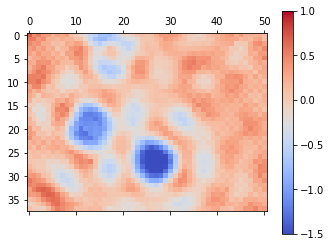

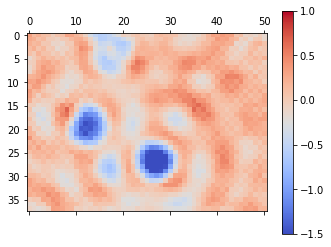

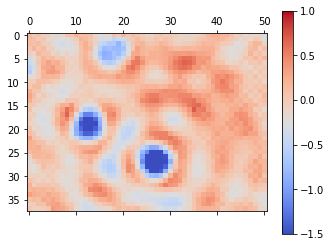

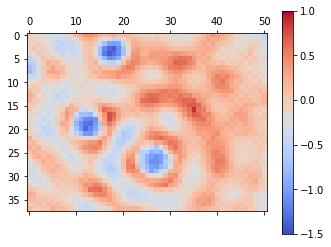

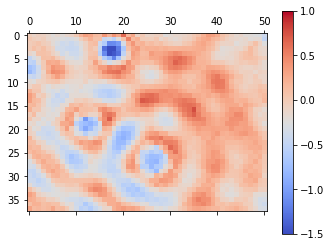

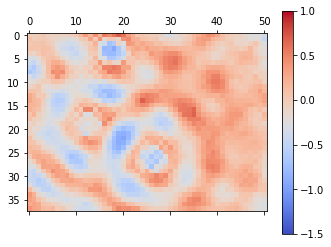

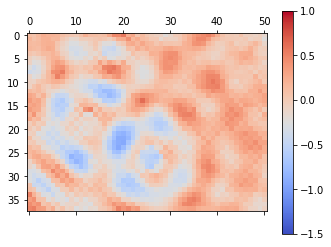

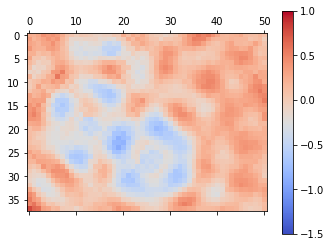

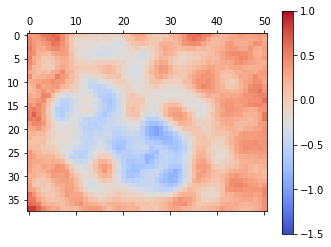

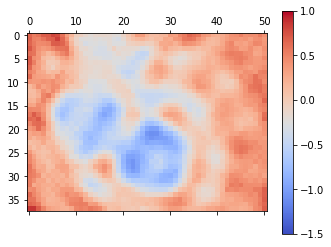

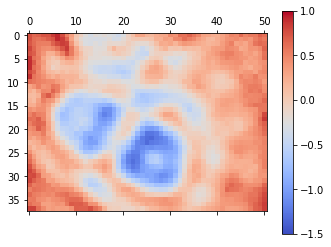

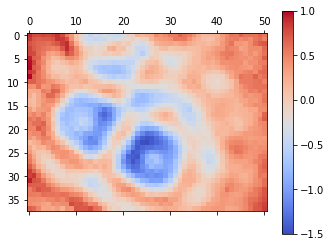

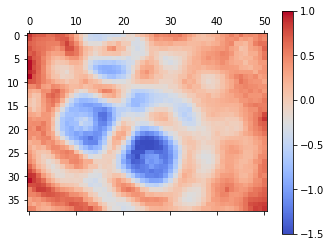

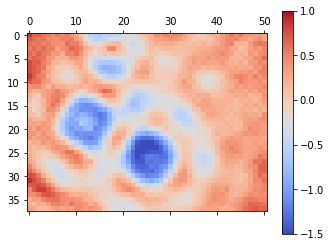

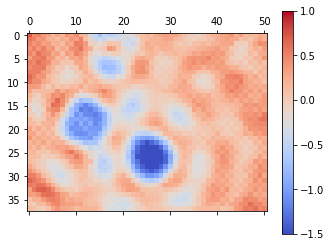

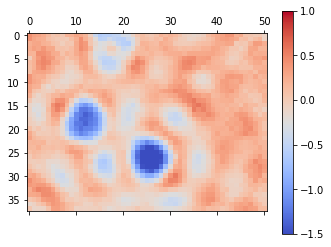

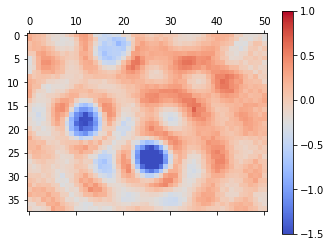

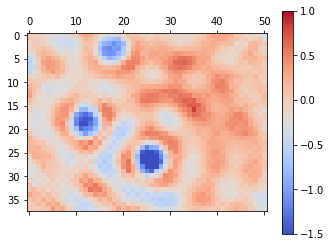

In [41]:
counter = 0
for frame in frames:
    process(refFile, frame,  counter)
    counter += 1